# «Расчет сечений электрослабых процессов»
## по дисциплине «Введение в стандартную модель элементарных частиц»

Мёллеровское рассеяние - это название, данное **электрон-электронному** рассеянию в квантовой теории поля.

Мы можем выразить этот процесс в обычных обозначениях, часто используемых в физике элементарных частиц : 
![wikimedia.org](https://wikimedia.org/api/rest_v1/media/math/render/svg/6b288ae0d3888caa3ac0fa9914ca4f3979c4a0aa)

В квантовой электродинамике есть две трехуровневые диаграммы Фейнмана, описывающие процесс: диаграмма t-канала , в которой электроны обмениваются фотоном, и аналогичная диаграмма u-канала. 

t-channel | u-channel
- | - 
![wikimedia.org](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/MollerScattering-t.svg/440px-MollerScattering-t.svg.png) | ![wikimedia.org](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/MollerScattering-u.svg/440px-MollerScattering-u.svg.png)


Сечение рассеяние Мёллера можно рассчитать с точки зрения КЭД на уровне дерева с помощью двух диаграмм, показанных выше.
Для этого введем 4х импульсы как ![wikimedia.org](https://wikimedia.org/api/rest_v1/media/math/render/svg/2335ab43ab6a9e2a1e2926ce1f8747042d88480c) для входящих электронов ![wikimedia.org](https://wikimedia.org/api/rest_v1/media/math/render/svg/b3aa17f38db56be23717844db054d0a47fe0e6d1) для выходящих электронов, и ![wikimedia.org](https://wikimedia.org/api/rest_v1/media/math/render/svg/7334426de6650cb0120955adfad27a31b7a219f8)

Выражение для переменных мандельстама:
![wikimedia.org](https://wikimedia.org/api/rest_v1/media/math/render/svg/2d65c05d8090c14475222bc1d9320ea9fa69b973)

![wikimedia.org](https://wikimedia.org/api/rest_v1/media/math/render/svg/5cb648e5ae6bc6c7d6b7ea99b0af886f5b91be06)

![wikimedia.org](https://wikimedia.org/api/rest_v1/media/math/render/svg/7dbab6b9235bd0537ff4bd3320479c222431e9e7)

![wikimedia.org](https://wikimedia.org/api/rest_v1/media/math/render/svg/21bfd4705de353613b6b416bacd6ba532dc75da3)





Исходя из [правил Фейнмана](https://ru.wikipedia.org/wiki/Правила_Фейнмана)
матричный элемент t-канала будет равен ![wikimedia.org](https://wikimedia.org/api/rest_v1/media/math/render/svg/2bf8e90929f50683ef96e59eb011465871708829)
аналогично для u-канала ![wikimedia.org](https://wikimedia.org/api/rest_v1/media/math/render/svg/f86ed3d96ee1c120493a24c19cbcdb1088f068d4)
суммарно они дают вклад:
![wikimedia.org](https://wikimedia.org/api/rest_v1/media/math/render/svg/e2960b3a687aa0377c1350b20907efd8d9378813)


### ... дописать еще
![wikimedia.org](https://wikimedia.org/api/rest_v1/media/math/render/svg/df816c0cdaad9375f015baf3a1c21f4543bc21fd)
СЦИ 

![wikimedia.org](https://wikimedia.org/api/rest_v1/media/math/render/svg/8f2ff27326061cb0966d0921362fbcc8450ccda0) ![wikimedia.org](https://wikimedia.org/api/rest_v1/media/math/render/svg/113e8a80972a6492dd52321071b3f264d49a9d1e)

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats
import scipy.constants as sc

In [2]:
alpha = sc.fine_structure
alpha

0.0072973525664

In [3]:
x = np.zeros(181)
Energy_ = [0] * 151

intdiff = [0] * 151
t = [0] * 181
dif = np.zeros((181, 151))
dif_cs = [0] * 181
d = np.zeros((181, 151), dtype=float)


In [4]:
# цикл по энергиям (0,150) и по углам (0,180)

vvod = input("E, meV:")
Energy = int(vvod)

for E in range(1, 1501, 10):
    Energy_[E // 10] = E 
    E_cm = E*2
    for i in range(0, 181):
        teta = math.radians(i)
        x[i] = math.cos(teta)
        if math.sin(teta) > 0.000001 :
                dif[i][E // 10] = ((alpha * alpha)*pow((3+pow(math.cos(teta),2)),2))/(pow(E_cm,2)*pow(math.sin(teta),4))
       # d[i][E // 10] = (dif[i][E // 10])*2 * 3.14 * math.sin(teta) 

        dif_cs[i] = dif[i][Energy // 10]
        #t[i] = d[i][E // 10]
        
        
        intdiff[E // 10] += (dif[i][E // 10])*2 * 3.14 * math.sin(teta) * 0.0175



E, meV:200


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  # Remove the CWD from sys.path while we load stuff.


(1.2823351864847196e-09, 1e-06)

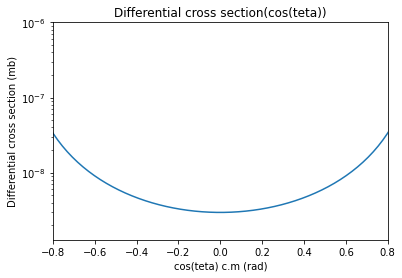

In [5]:
#График зависимости дифференциального сечения от косинуса угла (в радианах)

plt.title("Differential cross section(cos(teta))")
plt.xlabel("cos(teta) c.m (rad)")
plt.ylabel("Differential cross section (mb)")

plt.yscale('log')
plt.plot(x,dif_cs)
plt.xlim([-0.8,0.8])
plt.ylim([0,pow(10,-6)])

#dif_cs
#x

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

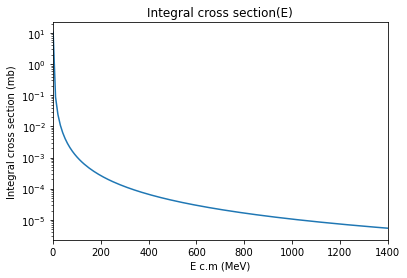

In [11]:
#График зависимости интегрального сечения от энергии (в МэВ)
plt.title("Integral cross section(E)")
plt.xlabel("E c.m (MeV)")
plt.ylabel("Integral cross section (mb)")
plt.plot(Energy_, intdiff)
plt.yscale('log')
plt.xlim([0,1400])
plt.plot